In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [9]:
fname="../data/model_sims/baseline/american-butterfish/1984/annual.nc"
dset = nc.Dataset(fname)

settled_fname="../data/model_sims/baseline/american-butterfish/1984/settlement.nc"
sett_dset = nc.Dataset(settled_fname)
settled_particles=sett_dset['settled_particles'][:].data

In [17]:
idxs = np.where(settled_particles == 1)[0]

In [18]:
dset.variables

OrderedDict([('x',
              <class 'netCDF4._netCDF4.Variable'>
              float64 x(time, nlag)
              unlimited dimensions: 
              current shape = (97, 997856)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('y',
              <class 'netCDF4._netCDF4.Variable'>
              float64 y(time, nlag)
              unlimited dimensions: 
              current shape = (97, 997856)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('h',
              <class 'netCDF4._netCDF4.Variable'>
              float64 h(time, nlag)
              unlimited dimensions: 
              current shape = (97, 997856)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('pathlength',
              <class 'netCDF4._netCDF4.Variable'>
              float64 pathlength(time, nlag)
              unlimited dimensions: 
              current shape = (97, 997856)
           

In [19]:
depths = dset['h'][:].data

In [24]:
np.histogram(depths[0, idxs], bins=np.arange(0, 200, 10))

(array([35599, 40091, 65416, 68490, 48149, 21906, 11724,  6298,  2917,
         1742,   749,   372,   263,   209,   149,    94,    38,    39,
           11]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190]))

In [49]:
x, y = dset['x'][:].data, dset['y'][:].data
x = x[:, 1:]
y = y[:, 1:]

In [30]:
ps = np.random.choice(idxs, 100)

In [32]:
xs = x[:, ps]
ys = y[:, ps]

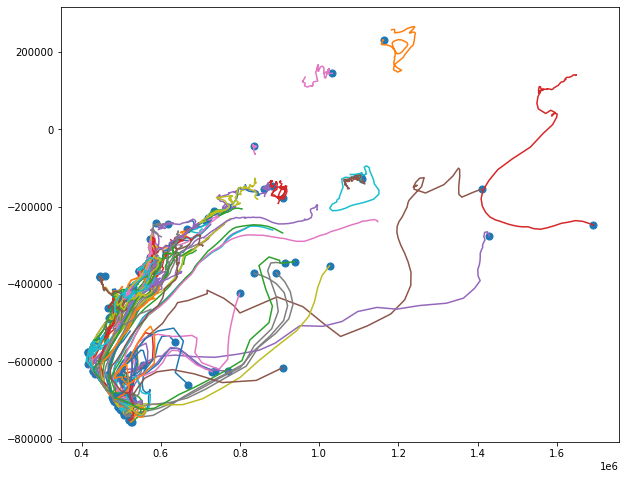

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(xs, ys)
ax.scatter(xs[-1, :], ys[-1, :], s=50)

In [34]:
xs

array([[666336.57      , 564430.4338    , 688854.3806    , ...,
        574339.0359    , 518776.4847    , 534173.6846    ],
       [666336.57      , 564430.4338    , 688854.3806    , ...,
        574339.0359    , 518776.4847    , 534173.6846    ],
       [666336.57      , 564430.4338    , 688854.3806    , ...,
        574339.0359    , 518776.4847    , 534122.53386152],
       ...,
       [463808.6137531 , 482219.10328614, 501274.95518513, ...,
        507878.61062598, 474064.16026824, 484103.57251829],
       [462040.68243188, 480907.12425065, 506061.9097361 , ...,
        507878.61062598, 473146.34807327, 485636.59744023],
       [456521.83570566, 482527.97485746, 499195.52114595, ...,
        507878.61062598, 471160.26568575, 485482.75253806]])

In [42]:
ys[0, :], ys[-1, :]

(array([-240693.4694    , -387249.9531    , -312822.3003    ,
        -552298.8765    , -380577.7524    , -636254.4801    ,
        -607567.7399    , -245530.1519    , -132963.7871    ,
        -257629.392     , -545738.9987    , -561728.9814    ,
        -465815.4749    , -285177.0366    , -173328.098     ,
        -276746.2114    , -233886.515     , -495981.8242    ,
        -452722.3426    , -350777.2051    , -170997.2896    ,
        -326896.2964    , -206090.3981    , -285191.9582    ,
        -249295.0364    , -402172.6609    ,  134996.6845    ,
        -277628.7563    , -427385.9788    , -260237.96      ,
        -414840.9353    , -333910.4861    , -421681.20967844,
        -136738.0618    , -155821.9923    , -418145.1507    ,
        -311044.8366    , -300362.1497    , -231217.93731235,
        -398700.156     , -415534.1754    , -399059.1669    ,
        -495593.5427    , -321625.0645    , -258959.4604    ,
        -284571.6335    , -367368.2198    , -243132.4855    ,
        

In [52]:
len(np.where(y[-1, idxs] - y[0, idxs] > 0)[0])/len(idxs)

0.175145401373509

In [48]:
xs.shape

(97, 100)

In [53]:
import pandas as pd

In [57]:
sett_data = pd.read_csv("../data/model_sims/baseline/american-butterfish/settled_data.csv")
sett_data = sett_data[sett_data.settled_particles == 1]

In [58]:
init_lat, final_lat = sett_data['init_lats'].to_numpy(), sett_data['final_lats'].to_numpy()

In [63]:
np.sum(final_lat - init_lat > 0, axis=0)/len(final_lat)

0.3232467451746251

In [64]:
sett_data

,Unnamed: 0,init_lons,init_lats,init_times,init_region,final_lons,final_lats,final_times,final_region,years,settled_particles
6,13,-75.011568,36.612315,144.0,Mid-Atlantic Bight,-75.011563,36.612308,198.0,Mid-Atlantic Bight,1984.0,1.0
10,19,-75.015289,36.615215,151.0,Mid-Atlantic Bight,-75.015286,36.615213,199.0,Mid-Atlantic Bight,1984.0,1.0
12,21,-75.011322,36.610884,135.0,Mid-Atlantic Bight,-75.011314,36.610884,182.0,Mid-Atlantic Bight,1984.0,1.0
14,23,-75.005548,36.606069,140.0,Mid-Atlantic Bight,-75.005542,36.606068,189.0,Mid-Atlantic Bight,1984.0,1.0
18,29,-75.008238,36.612288,147.0,Mid-Atlantic Bight,-72.809219,38.452049,201.0,Off-Shelf,1984.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4388747,4989829,NaN,NaN,NaN,NaN,-64.122992,45.216445,215.0,Bay of Fundy,1988.0,1.0
4388748,4989830,-63.433438,45.363464,170.0,Bay of Fundy,-64.554368,45.387100,220.0,Bay of Fundy,1988.0,1.0
4388749,4989831,-63.429493,45.362933,165.0,Bay of Fundy,-63.721638,45.376554,218.0,Bay of Fundy,1988.0,1.0
4388750,4989832,NaN,NaN,NaN,NaN,-63.708533,45.350132,218.0,Bay of Fundy,1988.0,1.0


In [65]:
northward_connections = {
    "Mid-Atlantic Bight": ["Southern New England", "Georges Bank", "Gulf of Maine", "Bay of Fundy", "Scotian Shelf"],
    "Southern New England": ["Georges Bank", "Gulf of Maine", "Bay of Fundy", "Scotian Shelf"],
    "Georges Bank": ["Gulf of Maine", "Bay of Fundy", "Scotian Shelf"],
    "Gulf of Maine": ["Bay of Fundy", "Scotian Shelf"],
    "Bay of Fundy": ["Scotian Shelf"]
}

In [66]:
k = "Mid-Atlantic Bight"

In [76]:
for k in northward_connections.keys():
    print(len(sett_data[((sett_data.init_region == k) & (sett_data.final_region.isin(northward_connections[k])))]))

144118
11488
4110
234
0


In [77]:
len(sett_data)

2220242

In [99]:
ps = []
for y in range(1984, 1989):
    d = sett_data[sett_data.years == y]
    ps.append(len(d[((d.final_region == "Bay of Fundy") & (d.init_region == "Southern New England"))])/len(d[((d.final_region == "Bay of Fundy"))]))

In [100]:
np.mean(np.array(ps))

0.22579676405540683